# Analyze employee resignation due to dissatisfaction

In this project, I will be working with two data set, exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

My goal is to answer the following questions: 
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


I observed many missing values in DETE data set, especially information on the employee origin (`Torres Strait`/`Aboriginal`) and disability. There are also abbreviate data in a few columns (`Kept informed`, `Wellness programs`, `Health & Safety`) with no explanations.

In [2]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


For the TAFE data set, the column names are very long and inconsistent (`Contributing Factors. Study`, `LengthofServiceOverall. Overall Length of Service at Institute (in years)`). These column names need to be standardized. There are also missing values but no column with extreme amount of missing values.

The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN. 

In [3]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

The two data set contains many columns that are not needed for my analysis so I will drop them.

In [4]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [5]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Also, some columns contain the same information but were named differently in the two data sets, so I will need to standardize them before merging the data.

In [6]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()

In [7]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [8]:
name_change = {'Record ID':'id', 'CESSATION YEAR':'cease_date', 'Reason for ceasing employment':'separationtype', 'Gender. What is your Gender?':'gender', 'CurrentAge. Current Age':'age', 'Employment Type. Employment Type':'employment_status',
'Classification. Classification':'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}

In [9]:
tafe_survey_updated.rename(name_change, axis=1, inplace=True)

In [10]:
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


In [11]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [12]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [13]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [14]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Looking at the unique values in the separationtype columns in each dataframe, I see that each contains a couple of different separation types. For this project, I'll only analyze survey respondents who resigned, so their separation type contains the string `Resignation`.

The DETE data set contains multiple separation types with the string 'Resignation':
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate
I'll have to account for each of these variations so I don't unintentionally drop data!

I select only the data for survey respondents who have a `Resignation` separation type by creating a regex and use `str.contains` method to get a series of boolean values, and use this series to index the dataframe:

In [15]:
resign = r"Resignation(-)?"
dete_resign = dete_survey_updated['separationtype'].str.contains(resign, na=False)
dete_resignations = dete_survey_updated[dete_resign].copy()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


Let's print the first 5 rows to confirm if the filtering works for DETE data:

In [16]:
print(dete_resignations.head())

    id                        separationtype cease_date  dete_start_date  \
3    4             Resignation-Other reasons    05/2012           2005.0   
5    6             Resignation-Other reasons    05/2012           1994.0   
8    9             Resignation-Other reasons    07/2012           2009.0   
9   10            Resignation-Other employer       2012           1997.0   
11  12  Resignation-Move overseas/interstate       2012           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  ...   work_life_balance  \


In [17]:
tafe_resign = tafe_survey_updated['separationtype'].str.contains(resign, na=False).copy()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


In [18]:
tafe_resignations = tafe_survey_updated[tafe_resign].copy()
print(tafe_resignations.head())

             id                              Institute  \
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   
5  6.341475e+17  Southern Queensland Institute of TAFE   
6  6.341520e+17         Barrier Reef Institute of TAFE   
7  6.341537e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date separationtype  \
3  Non-Delivery (corporate)      2010.0    Resignation   
4       Delivery (teaching)      2010.0    Resignation   
5       Delivery (teaching)      2010.0    Resignation   
6  Non-Delivery (corporate)      2010.0    Resignation   
7       Delivery (teaching)      2010.0    Resignation   

  Contributing Factors. Career Move - Public Sector   \
3                                                  -   
4                                                  -   
5                                                  -   
6                                                  -   
7                     

The filtering works for both data sets. Now let check for errors in the data set before moving on to analysis.

In [19]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
2010         1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [20]:
year_regex = r"([0-1][0-9])?/?([1-2][0-9]{3})"
years = dete_resignations['cease_date'].str.extract(year_regex)
years = years[1].astype(float)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [21]:
dete_resignations['cease_date'] = years
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [22]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [23]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Since the `cease_date` is the last year of the person's employment, it wouldn't make sense to have years after the current date. In addition, given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

It seems that there is no issue with the data for `cease_date` in both data sets and `dete_start_date` for DETE data.

Let's see if any numeric columns have abnormal values:

In [24]:
dete_resignations.describe()

,id,cease_date,dete_start_date,role_start_date
count,311.000000,300.00000,283.000000,271.000000
mean,427.739550,2012.60000,2002.067138,1999.653137
std,235.028398,0.75403,9.914479,109.965675
min,4.000000,2006.00000,1963.000000,200.000000
25%,256.500000,2012.00000,1997.000000,2004.000000
50%,434.000000,2013.00000,2005.000000,2009.000000
75%,626.500000,2013.00000,2010.000000,2011.000000
max,823.000000,2014.00000,2013.000000,2013.000000


Using `describe` method, I found that the minimum value for column `role_start_date` is 200, which is abnormal. 

In [25]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [26]:
print(dete_resignations['institute_service'])

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
12     14.0
14      5.0
16      NaN
20     30.0
21     32.0
22     15.0
23     39.0
25     17.0
27      7.0
33      9.0
34      6.0
37      1.0
39      NaN
40     35.0
41     38.0
42      1.0
43     36.0
48      3.0
50      3.0
51     19.0
55      4.0
57      9.0
61      1.0
69      6.0
71      1.0
       ... 
747     6.0
751     8.0
752    15.0
753     9.0
755     1.0
762     0.0
766     7.0
769     5.0
770     NaN
771    12.0
774     NaN
784     0.0
786    20.0
788     NaN
789    31.0
790     6.0
791     NaN
794     NaN
797     NaN
798     NaN
802     NaN
803    10.0
804     6.0
806     8.0
807     9.0
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64


I use the start date and cease date to calculate the length of time the employee spent in DETE.

In [27]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [28]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [29]:
dissatisfy = r"Dissatisfaction"
tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].str.contains(dissatisfy)

In [30]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [31]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].str.contains(dissatisfy)

In [32]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'] .value_counts(dropna=False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [33]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False).copy()

In [34]:
cols = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']
dete_resignations['dissatisfied'] = dete_resignations[cols].any(axis=1, skipna=False).copy()

In [35]:
print(tafe_resignations['dissatisfied'].head(20))

3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
13    False
14     True
15    False
16      NaN
17     True
18      NaN
19    False
20     True
21    False
22    False
23    False
24    False
Name: dissatisfied, dtype: object


In [36]:
print(dete_resignations['dissatisfied'].head(20))

3     False
5      True
8     False
9      True
11    False
12    False
14     True
16     True
20    False
21    False
22     True
23     True
25     True
27    False
33     True
34     True
37    False
39     True
40    False
41     True
Name: dissatisfied, dtype: bool


In [37]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

In [38]:
dete_resignations_up['institute'] = 'DETE'

In [39]:
tafe_resignations_up['institute'] = 'TAFE'

In [40]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], join='inner')

In [41]:
combined.describe(include='all')

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
count,6.510000e+02,651,635.000000,598,597,592,596,563,643,651
unique,NaN,4,NaN,21,6,2,17,49,2,2
top,NaN,Resignation,NaN,Administration (AO),Permanent Full-time,Female,51-55,Less than 1 year,False,TAFE
freq,NaN,340,NaN,148,256,424,71,73,403,340
mean,3.314265e+17,NaN,2011.963780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.172210e+17,NaN,1.079028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.000000e+00,NaN,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.525000e+02,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.341820e+17,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.345770e+17,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
combined['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


In [49]:
import re

regex1 = r"[1-7][1]?-[1-6][0]?"
regex2 = r"[1-9][0-9]?.[0]"

def change_year(col):
    if col == 'Less than 1 year':
        return '1'
    elif col == 'More than 20 years':
        return '20'
    elif re.match(regex1, col):
        return col.split('-')[1]
    elif re.match(regex2, col):
        return col.split('.')[0]
    else:
        return 'NaN'
combined['institute_service'] = combined['institute_service'].astype('str')
combined['institute_service'] = combined['institute_service'].apply(change_year)
    

In [50]:
combined['institute_service'].value_counts()

NaN    108
1       95
4       79
2       78
6       50
20      43
10      27
5       23
3       20
9       14
7       13
8        8
13       8
15       7
22       6
12       6
14       6
17       6
16       5
18       5
23       4
11       4
24       4
32       3
39       3
21       3
19       3
25       2
28       2
30       2
36       2
26       2
42       1
49       1
33       1
29       1
35       1
38       1
34       1
31       1
41       1
27       1
Name: institute_service, dtype: int64

In [51]:
combined['institute_service'] = combined['institute_service'].astype('float')

In [53]:
def change_exp(col):
    if col < 3:
        return 'New'
    elif 3 <= col < 7:
        return 'Experienced'
    elif 7 <= col < 11:
        return 'Established'
    elif 11 <= col:
        return 'Veteran'
    elif pd.isnull(col):
        return np.nan
    
combined['service_cat'] = combined['institute_service'].apply(change_exp)

In [58]:
combined['service_cat'].value_counts(dropna=False)

New            173
Experienced    172
Veteran        136
NaN            108
Established     62
Name: service_cat, dtype: int64

In [59]:
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [60]:
combined['dissatisfied'] = combined['dissatisfied'].fillna(False)

In [64]:
pv_exp_satisfy = combined.pivot_table(index='service_cat', values='dissatisfied')

In [65]:
%matplotlib inline

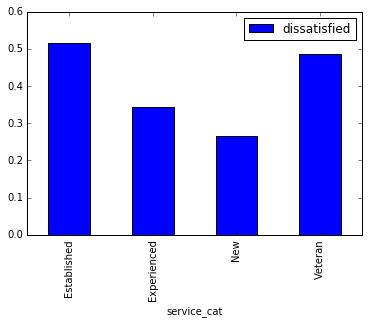

In [79]:
pv_exp_satisfy.plot(kind='bar')